In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import datetime as dt
from sklearn import metrics
from sklearn.metrics import r2_score

# Splitting the dataset into train and test set
from sklearn.model_selection import train_test_split

#### Data Cleaning
We load the dataset and clean data the data before we proceed with Exploratory Data Analysis (EDA)


In [2]:
dataset = pd.read_csv("https://raw.githubusercontent.com/mzisyraf/GoldStockAdvisor/main/FINAL_USO.csv")
dataset['Date'] = pd.to_datetime(dataset['Date'])
dataset['Date']=dataset['Date'].map(dt.datetime.toordinal)
dataset

,Date,Open,High,Low,Close,Adj Close,Volume,SP_open,SP_high,SP_low,...,GDX_Low,GDX_Close,GDX_Adj Close,GDX_Volume,USO_Open,USO_High,USO_Low,USO_Close,USO_Adj Close,USO_Volume
0,734486,154.740005,154.949997,151.710007,152.330002,152.330002,21521900,123.029999,123.199997,121.989998,...,51.570000,51.680000,48.973877,20605600,36.900002,36.939999,36.049999,36.130001,36.130001,12616700
1,734487,154.309998,155.369995,153.899994,155.229996,155.229996,18124300,122.230003,122.949997,121.300003,...,52.040001,52.680000,49.921513,16285400,36.180000,36.500000,35.730000,36.270000,36.270000,12578800
2,734490,155.479996,155.860001,154.360001,154.869995,154.869995,12547200,122.059998,122.320000,120.029999,...,51.029999,51.169998,48.490578,15120200,36.389999,36.450001,35.930000,36.200001,36.200001,7418200
3,734491,156.820007,157.429993,156.580002,156.979996,156.979996,9136300,122.180000,124.139999,120.370003,...,52.369999,52.990002,50.215282,11644900,37.299999,37.610001,37.220001,37.560001,37.560001,10041600
4,734492,156.979996,157.529999,156.130005,157.160004,157.160004,11996100,123.930000,124.360001,122.750000,...,52.419998,52.959999,50.186852,8724300,37.669998,38.240002,37.520000,38.110001,38.110001,10728000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1713,737052,119.570000,120.139999,119.570000,120.019997,120.019997,9736400,239.039993,240.839996,234.270004,...,20.650000,21.090000,21.090000,60507000,9.490000,9.520000,9.280000,9.290000,9.290000,21598200
1714,737054,120.620003,121.000000,119.570000,119.660004,119.660004,14293500,235.970001,246.179993,233.759995,...,20.530001,20.620001,20.620001,76365200,9.250000,9.920000,9.230000,9.900000,9.900000,40978800
1715,737055,120.570000,120.900002,120.139999,120.570000,120.570000,11874400,242.570007,248.289993,238.960007,...,20.700001,20.969999,20.969999,52393000,9.590000,9.650000,9.370000,9.620000,9.620000,36578700
1716,737056,120.800003,121.080002,120.720001,121.059998,121.059998,6864700,249.580002,251.399994,246.449997,...,20.570000,20.600000,20.600000,49835000,9.540000,9.650000,9.380000,9.530000,9.530000,22803400


In [3]:
print(dataset.columns)

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'SP_open', 'SP_high', 'SP_low', 'SP_close', 'SP_Ajclose', 'SP_volume',
       'DJ_open', 'DJ_high', 'DJ_low', 'DJ_close', 'DJ_Ajclose', 'DJ_volume',
       'EG_open', 'EG_high', 'EG_low', 'EG_close', 'EG_Ajclose', 'EG_volume',
       'EU_Price', 'EU_open', 'EU_high', 'EU_low', 'EU_Trend', 'OF_Price',
       'OF_Open', 'OF_High', 'OF_Low', 'OF_Volume', 'OF_Trend', 'OS_Price',
       'OS_Open', 'OS_High', 'OS_Low', 'OS_Trend', 'SF_Price', 'SF_Open',
       'SF_High', 'SF_Low', 'SF_Volume', 'SF_Trend', 'USB_Price', 'USB_Open',
       'USB_High', 'USB_Low', 'USB_Trend', 'PLT_Price', 'PLT_Open', 'PLT_High',
       'PLT_Low', 'PLT_Trend', 'PLD_Price', 'PLD_Open', 'PLD_High', 'PLD_Low',
       'PLD_Trend', 'RHO_PRICE', 'USDI_Price', 'USDI_Open', 'USDI_High',
       'USDI_Low', 'USDI_Volume', 'USDI_Trend', 'GDX_Open', 'GDX_High',
       'GDX_Low', 'GDX_Close', 'GDX_Adj Close', 'GDX_Volume', 'USO_Open',
       'USO_Hig

In [4]:
dataset.describe()

,Date,Open,High,Low,Close,Adj Close,Volume,SP_open,SP_high,SP_low,...,GDX_Low,GDX_Close,GDX_Adj Close,GDX_Volume,USO_Open,USO_High,USO_Low,USO_Close,USO_Adj Close,USO_Volume
count,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1.718000e+03,1718.000000,1718.000000,1718.000000,...,1718.000000,1718.000000,1718.000000,1.718000e+03,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1.718000e+03
mean,735785.811991,127.323434,127.854237,126.777695,127.319482,127.319482,8.446327e+06,204.490023,205.372637,203.487014,...,26.384575,26.715012,25.924624,4.356515e+07,22.113417,22.307148,21.904657,22.109051,22.109051,1.922313e+07
std,743.085152,17.526993,17.631189,17.396513,17.536269,17.536269,4.920731e+06,43.831928,43.974644,43.618940,...,10.490908,10.603110,9.886570,2.909151e+07,11.431056,11.478671,11.373997,11.432787,11.432787,1.575743e+07
min,734486.000000,100.919998,100.989998,100.230003,100.500000,100.500000,1.501600e+06,122.059998,122.320000,120.029999,...,12.400000,12.470000,12.269618,4.729000e+06,7.820000,8.030000,7.670000,7.960000,7.960000,1.035100e+06
25%,735144.250000,116.220001,116.540001,115.739998,116.052502,116.052502,5.412925e+06,170.392498,170.962506,169.577499,...,20.355000,20.585000,20.180950,2.259968e+07,11.420000,11.500000,11.300000,11.392500,11.392500,6.229500e+06
50%,735797.500000,121.915001,122.325001,121.369999,121.795002,121.795002,7.483900e+06,205.464996,206.459999,204.430000,...,22.870001,23.054999,22.677604,3.730465e+07,16.450000,16.635001,16.040000,16.345000,16.345000,1.613015e+07
75%,736428.250000,128.427494,129.087498,127.840001,128.470001,128.470001,1.020795e+07,237.292500,237.722500,236.147503,...,26.797500,27.317500,26.478154,5.697055e+07,34.419998,34.667499,34.110000,34.417499,34.417499,2.672375e+07
max,737059.000000,173.199997,174.070007,172.919998,173.610001,173.610001,9.380420e+07,293.089996,293.940002,291.809998,...,56.770000,57.470001,54.617039,2.321536e+08,41.599998,42.299999,41.299999,42.009998,42.009998,1.102657e+08


In [5]:
dataset.isna().sum()

Date             0
Open             0
High             0
Low              0
Close            0
                ..
USO_High         0
USO_Low          0
USO_Close        0
USO_Adj Close    0
USO_Volume       0
Length: 81, dtype: int64

In [6]:
dataset.isnull().sum()

Date             0
Open             0
High             0
Low              0
Close            0
                ..
USO_High         0
USO_Low          0
USO_Close        0
USO_Adj Close    0
USO_Volume       0
Length: 81, dtype: int64

In [7]:
# Getting the adjusted closing price columns only

columns = []
for i in range(len(dataset.columns)):
    if ("Adj Close" in dataset.columns[i] or "Ajclose" in dataset.columns[i] or "Date" in dataset.columns[i]):
        columns.append(dataset.columns[i])

display(columns)

['Date',
 'Adj Close',
 'SP_Ajclose',
 'DJ_Ajclose',
 'EG_Ajclose',
 'GDX_Adj Close',
 'USO_Adj Close']

In [9]:
class LinearsRegression():
    def __init__(self):
        self.theta = np.array([0.0, 0.0])
        pass

    def gradient_descent_training(self, x, y, alpha=0.01, iterations=100):
        training_example_num = y.shape[0]
        theta = self.theta.copy()

        cost_history = []

        for i in range(iterations):
            new_theta = [0 for _ in range(x.shape[1])]
            for j in range(len(new_theta)):
                new_theta[j] = theta[j] - alpha / training_example_num * np.sum((np.dot(x, theta) - y) * x[:, j])
            theta = np.array(new_theta)

            cost_history.append(self.compute_costfx(x, y, theta))
            self.theta = theta

        return theta, cost_history

    def compute_costfx(self, x, y, theta):
        training_example_num = y.size
        cost = (1 / (2 * training_example_num)) * np.sum(np.square(np.dot(x, theta) - y))

        return cost

Linear Regression using Date as Input

In [10]:
dateLR_column = []
dateLR_column.append(columns[0])
dateLR_column.append(columns[1])
display(dateLR_column)

['Date', 'Adj Close']

In [11]:
y_column = columns[1]
x_columns = columns[0]

In [12]:
y = dataset.loc[:, y_column].copy()
x = dataset.loc[:, x_columns].copy()

In [13]:
x_redo = x.to_frame(name = 'Date')

display(x_redo)

,Date
0,734486
1,734487
2,734490
3,734491
4,734492
...,...
1713,737052
1714,737054
1715,737055
1716,737056


In [14]:
y

0       152.330002
1       155.229996
2       154.869995
3       156.979996
4       157.160004
           ...    
1713    120.019997
1714    119.660004
1715    120.570000
1716    121.059998
1717    121.250000
Name: Adj Close, Length: 1718, dtype: float64

<Axes: >

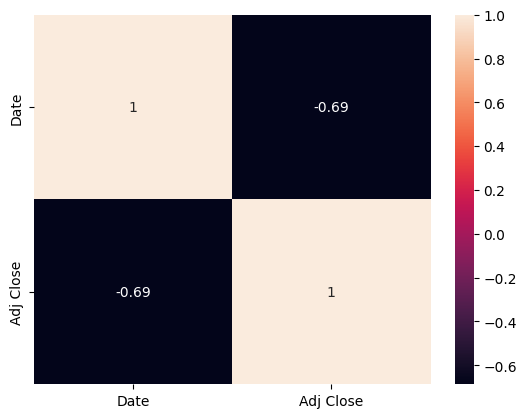

In [15]:
# Correlation matrix

full_dataset = dataset[dateLR_column].copy()
sns.heatmap(full_dataset.corr(), annot=True,)

All the features are ready, now we proceed with defining the model, and also splitting the dataset into test and training dataset

In [16]:
X_train, X_test, y_train, y_test = train_test_split(x_redo, y, test_size=0.2, shuffle = False, random_state = 24)

In [17]:
# Create a linear regression model
linear = LinearRegression().fit(X_train, y_train)

In [25]:
y_pred_train = linear.predict(X_train)

print("Error in training set")
# Check mean absolute error of model
print("MAE: ",metrics.mean_absolute_error(y_train,y_pred_train))

#Check MSE
print("MSE: ",metrics.mean_squared_error(y_train,y_pred_train))

#Check RMSE
print("RMSE: ",np.sqrt(metrics.mean_squared_error(y_train,y_pred_train)))
print("R2: ", r2_score(y_train, y_pred_train))


Error in training set
MAE:  10.682621795522484
MSE:  140.71552769531934
RMSE:  11.862357594311485
R2:  0.6150582860219661


In [26]:
y_pred_test = linear.predict(X_test)

print("Error in testing set")
# Check mean absolute error of model
print("MAE: ",metrics.mean_absolute_error(y_test,y_pred_test))

#Check MSE
print("MSE: ",metrics.mean_squared_error(y_test,y_pred_test))

#Check RMSE
print("RMSE: ",np.sqrt(metrics.mean_squared_error(y_test,y_pred_test)))
print("R2 :", r2_score(y_test, y_pred_test))

Error in testing set
MAE:  23.74560137414133
MSE:  576.2988509268337
RMSE:  24.006225253605233
R2 : -25.873988077561627


In [20]:
type(y_test)

pandas.core.series.Series

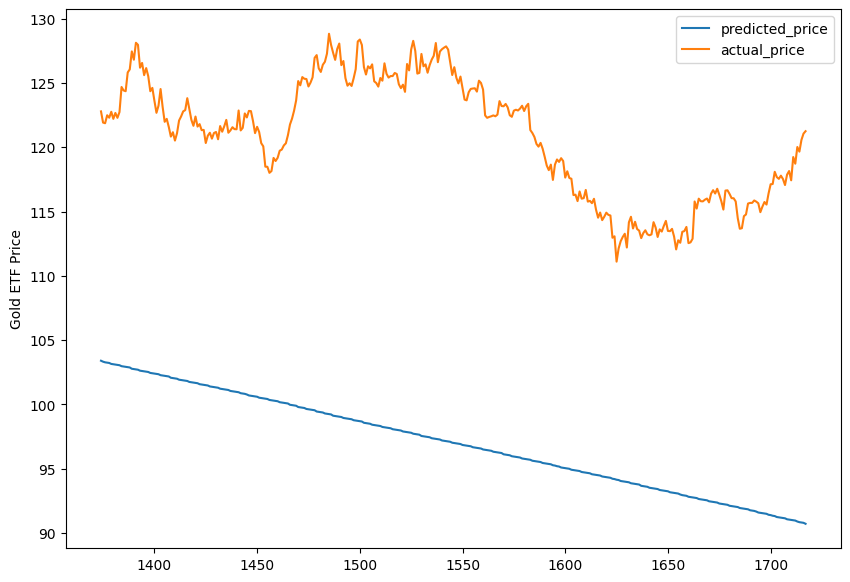

In [21]:
# Predicting the Gold ETF prices
#predicted_price = linear.predict(X_test)
predicted_price = y_pred_test
predicted_price = pd.DataFrame(
    predicted_price, index=y_test.index, columns=['price'])

predicted_price.plot(figsize=(10, 7))
y_test.plot()

#plt.plot(x[int(0.8*x.shape[0]):],predicted_price)
#plt.show()

plt.legend(['predicted_price', 'actual_price'])
plt.ylabel("Gold ETF Price")
plt.show()